In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt


2024-05-14 17:51:24.361353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 17:51:24.361469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 17:51:24.478808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 10
train_labels_one_hot = tf.one_hot(train_labels, depth=num_classes)
test_labels_one_hot = tf.one_hot(test_labels, depth=num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Define the softmax classifier model using TensorFlow Keras
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])


In [4]:
 #Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# Training parameters
training_epochs = 15
batch_size = 1000
display_step = 1

# Lists to store training and testing losses
xs, ytrs, ytes = [], [], []

# Training loop
for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost = 0.
    total_batch = len(train_images) // batch_size
    
    # Loop over all batches
    for i in range(total_batch):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_xs, batch_ys = train_images[start_idx:end_idx], train_labels_one_hot[start_idx:end_idx]
         # Perform one training step
        _, c = model.train_on_batch(batch_xs, batch_ys)
        train_avg_cost += c / total_batch
    test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0)
    test_avg_cost = test_loss
    
    # Store results for plotting
    xs.append(epoch)
    ytrs.append(train_avg_cost)
    ytes.append(test_avg_cost)
    
    # Display training progress
    if (epoch + 1) % display_step == 0:
        print(f"Epoch {epoch + 1}, Training Cost: {train_avg_cost}, Test Cost: {test_avg_cost}")


I0000 00:00:1715709097.984365      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1, Training Cost: 0.5101151754458744, Test Cost: 0.9726576209068298
Epoch 2, Training Cost: 0.8122476994991307, Test Cost: 0.7174316644668579
Epoch 3, Training Cost: 0.8422109375397366, Test Cost: 0.610816240310669
Epoch 4, Training Cost: 0.8562087217966714, Test Cost: 0.550736129283905
Epoch 5, Training Cost: 0.8644469728072484, Test Cost: 0.5114667415618896
Epoch 6, Training Cost: 0.8702870130538943, Test Cost: 0.48343101143836975
Epoch 7, Training Cost: 0.8750765790541968, Test Cost: 0.46221157908439636
Epoch 8, Training Cost: 0.8787650545438129, Test Cost: 0.44547104835510254
Epoch 9, Training Cost: 0.8817199220259981, Test Cost: 0.4318504333496094
Epoch 10, Training Cost: 0.8844246904055276, Test Cost: 0.4205010235309601
Epoch 11, Training Cost: 0.8865672061840693, Test Cost: 0.4108635187149048
Epoch 12, Training Cost: 0.8882229377826054, Test Cost: 0.40255266427993774
Epoch 13, Training Cost: 0.889700320363045, Test Cost: 0.395293653011322
Epoch 14, Training Cost: 0.8912284

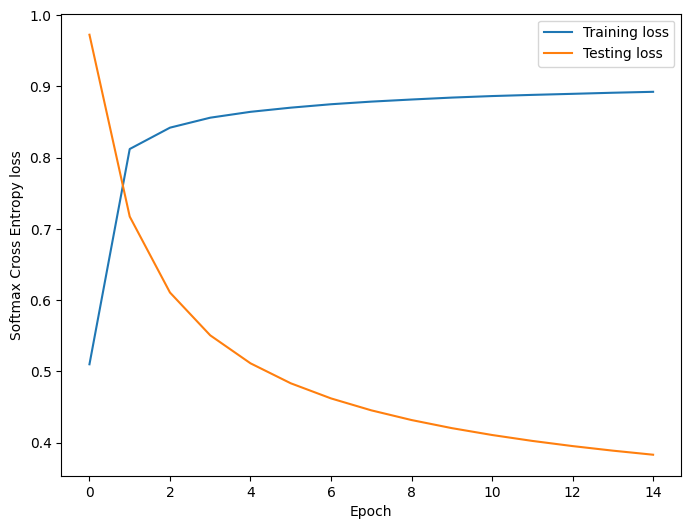

Test Accuracy: 0.8978000283241272


In [6]:
# Plotting training and testing losses
plt.figure(figsize=(8, 6))
plt.plot(xs, ytrs, label='Training loss')
plt.plot(xs, ytes, label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Softmax Cross Entropy loss')
plt.legend()
plt.show()

# Evaluate accuracy on test data
test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0)[1]
print("Test Accuracy:",test_accuracy)